# Qualitative Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import seaborn as sns

from os import listdir
from os.path import isfile, join


#Parsing:
import dateparser # $ pip install dateparser



import re

#Wordcloud:
from wordcloud import WordCloud

- Essayer de voir ce qui se passe sur Twitter
    - Au niveau des Hashtags: ceux d'émissions de TV ? 
    - Au niveau des Comptes cités: pareil 

- Essayer de voir sur YT par exemple 
    - Il semblerait, après un petit check, que la plupart des vidéos sont en fait des vidéos issues de chaines TV. 

- Comparaison Factiva / Twitter:
    - Nuages de mots? (en selectionnant les X articles/tweets les plus lus/vus)
        - Ou alors selectionner seulement certaines sources sur Factiva
        
        
**Est-ce qu'il y a un pic sauf pour ceux qui n'étaient pas invité à Face à La guerre??**

On pourrait faire comme critique: 
- Y a t'il le même nombre de tweets entre ceux qui citent le compte explicitement et ceux qui ne disent que le nom. 
    - i.e. "Mélenchon" et "@..."

## Simple Viz of some tweets:

In [10]:
#Listing all the files in the folder:
rel_path_tweets_10RT = 'data/tweets/10'
files_tweets_10RT = [f for f in listdir(rel_path_tweets_10RT) if isfile(join(rel_path_tweets_10RT, f))]
#Initializing a pd df:
df_tweets_10RT = pd.DataFrame()
for f in files_tweets_10RT:
    df_temp = pd.read_csv(rel_path_tweets_10RT+'/'+f)
    #Concat:
    df_tweets_10RT = pd.concat([df_tweets_10RT, df_temp])

In [19]:
df_tt = df_tweets_10RT[['id', 'candidate', 'text', 'retweet_count', 'user_screen_name']].copy()

In [21]:
mlp = df_tt[df_tt['candidate']=='le_pen'].sort_values('retweet_count', ascending=False)[:10]

In [23]:
mlp

id candidate  \
6712  1480828003160571908    le_pen   
7050  1478846266998235137    le_pen   
7977  1491856727540736004    le_pen   
7095  1478465290295984140    le_pen   
7129  1478133109115998209    le_pen   
5159  1487158363632902145    le_pen   
2134  1496144289721692163    le_pen   
1992  1496539760365613088    le_pen   
4608  1488870309667213315    le_pen   
2299  1495726253286080515    le_pen   

                                                   text  retweet_count  \
6712  Je considère que @JLMelenchon, @MLP_officiel e...           3115   
7050  #PasseVaccinal : "On ne peut pas raconter n'im...           2816   
7977  Je vous annonce ce soir quitter le @RNational_...           2520   
7095  Un Président ne devrait pas dire ça. Le garant...           2318   
7129  "Je suis frappée par votre agressivité", lance...           2099   
5159  Avec Viktor Orbán et @Santi_ABASCAL ! 🇭🇺🇪🇸🇫🇷 h...           2036   
2134  🇫🇷🗳Ce soir, à 19h00, je lance une consultation...           2027   
1992  À l'occasion d'un débat sur le Mali, @ClaudeMa...           1928   
4608  Les candidates @vpecresse  @MLP_officiel nous ...           1887   
2299  📹 Je lance un appel aux maires : si vous ne m'...           1828   

     user_screen_name  
6712   gerard_larcher  
7050              LCP  
7977       S_Blanchon  
7095     MLP_officiel  
7129              LCP  
5159     MLP_officiel  
2134  CharlesAslangul  
1992      publicsenat  
4608     GabrielAttal  
2299     MLP_officiel

In [22]:
mlp['text'].values

array(['Je considère que @JLMelenchon, @MLP_officiel et @ZemmourEric doivent pouvoir se présenter à la présidentielle. Ne pas y parvenir serait un mauvais signal pour notre démocratie. Les élus doivent utiliser sans crainte leur droit de parrainage. Parrainer n’est pas soutenir. #79Inter',
       '#PasseVaccinal : "On ne peut pas raconter n\'importe quoi ! Ce que vous mettez en œuvre n\'est pas une incitation, c\'est une sanction !" lance @MLP_officiel à @olivierveran. \n"Vous obligez les personnes à se faire vacciner en leur faisant subir des pressions sociales."\n #DirectAN https://twitter.com/LCP/status/1478846266998235137/video/1',
       'Je vous annonce ce soir quitter le @RNational_off et rejoindre @ZemmourEric dans la grande @Reconquete2022. Nous devons sauver la France et notre civilisation ! 🇫🇷\n\n#Voiron #UnionDesDroites\n@G_Peltier @stanislasrig @via_officiel https://twitter.com/S_Blanchon/status/1491856727540736004/photo/1',
       "Un Président ne devrait pas dire ça. Le 

## Hashtags // Accounts

### Hashtags

In [2]:
#Listing all the files in the folder:
rel_path_tweets_10RT = 'data/tweets/10'
files_tweets_10RT = [f for f in listdir(rel_path_tweets_10RT) if isfile(join(rel_path_tweets_10RT, f))]
#Initializing a pd df:
df_tweets_10RT = pd.DataFrame()
for f in files_tweets_10RT:
    df_temp = pd.read_csv(rel_path_tweets_10RT+'/'+f)
    #Concat:
    df_tweets_10RT = pd.concat([df_tweets_10RT, df_temp])

In [3]:
selected_tweet_cols = ['id', 'text', 'retweet_count', 'candidate']

df_tweets_red = df_tweets_10RT[selected_tweet_cols].copy()

In [4]:
#Is this the right regex to extract hashtags?
df_tweets_red['hashtag'] = df_tweets_red['text'].str.findall(r"#(\w+)")
#Exploding:
df_tweets_red = df_tweets_red.explode('hashtag').reset_index(drop=True)

In [5]:
df_hashtags = df_tweets_red.groupby(['hashtag', 'candidate'])['retweet_count'].sum().reset_index().copy()

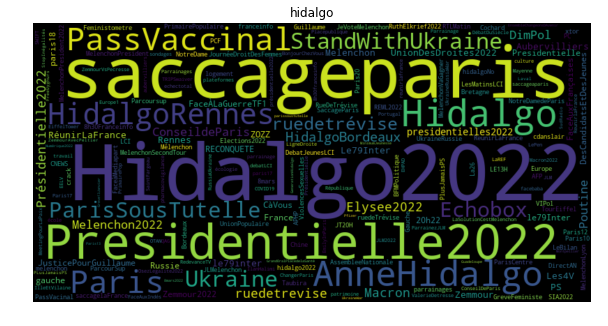

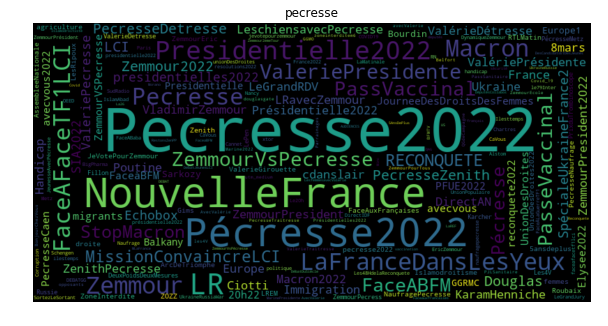

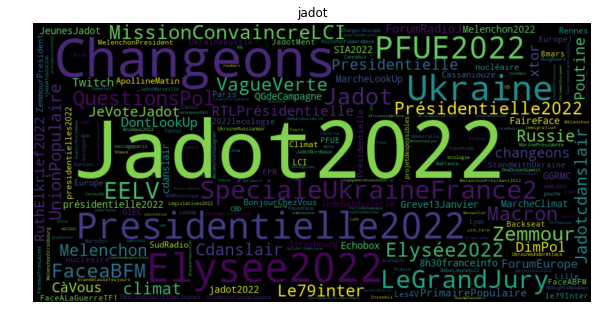

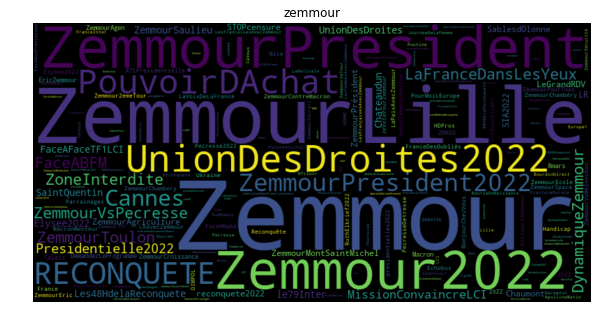

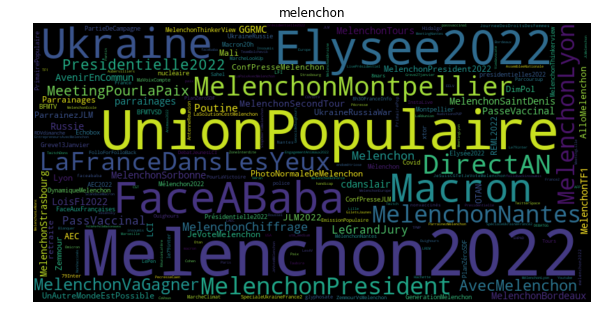

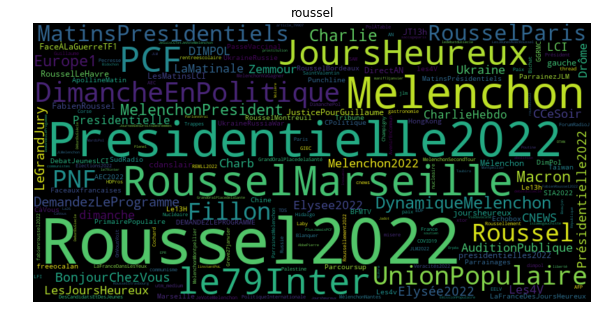

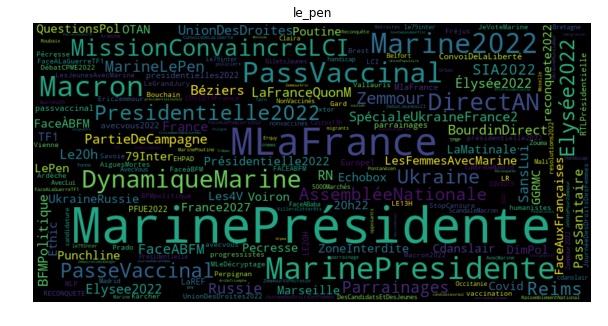

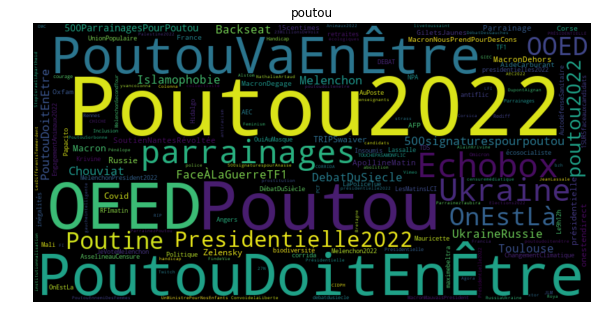

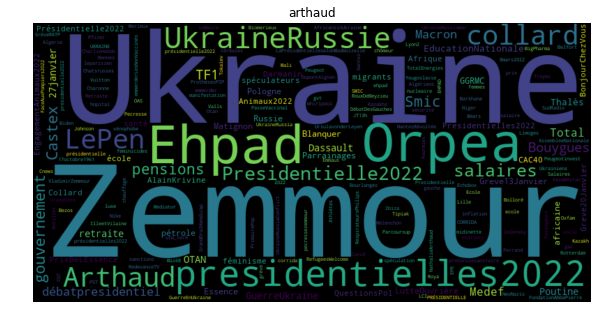

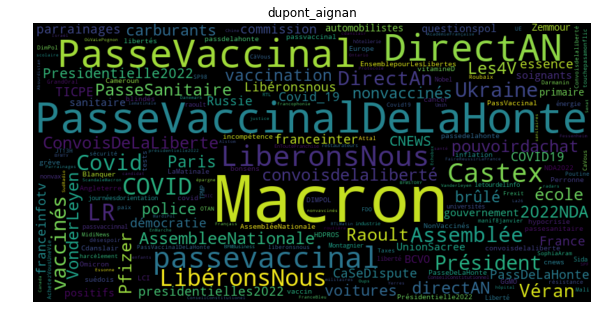

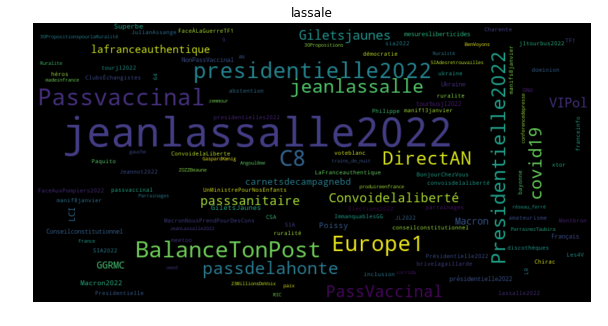

In [6]:
#convert to dict
for cand in df_hashtags['candidate'].unique():

    hashtag_weights = df_hashtags[df_hashtags['candidate']==cand].set_index('hashtag').to_dict()['retweet_count']
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(hashtag_weights)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(cand)
    plt.axis('off')
    plt.show()

#### Poutou: Hashtag ranking

In [9]:
df_hashtags[df_hashtags['candidate']=='poutou'].set_index('hashtag').sort_values('retweet_count', ascending=False)[:10]

candidate  retweet_count
hashtag                                  
Poutou2022          poutou          21593
Poutou              poutou          13565
OEED                poutou          12529
PoutouDoitEnÊtre    poutou          10413
PoutouVaEnÊtre      poutou           8369
Echobox             poutou           2795
parrainages         poutou           2534
Ukraine             poutou           2476
OnEstLà             poutou           1519
OOED                poutou           1477

### Cited Accoutns

In [38]:
#Is this the right regex to extract accounts?
df_tweets_red['accounts'] = df_tweets_red['text'].str.findall(r"@(\w+)")
#Exploding:
df_tweets_red = df_tweets_red.explode('accounts').reset_index(drop=True)

In [39]:
df_accounts = df_tweets_red.groupby(['accounts', 'candidate'])['retweet_count'].sum().reset_index().copy()

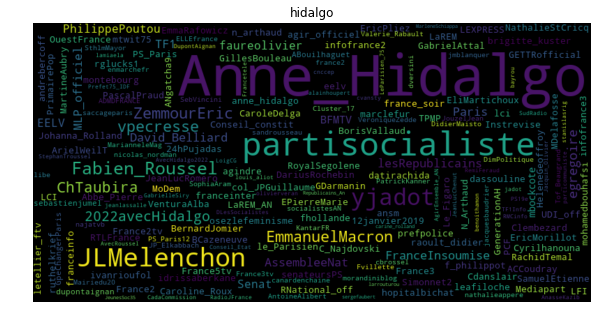

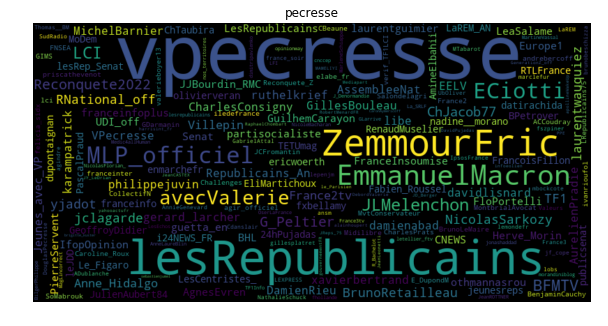

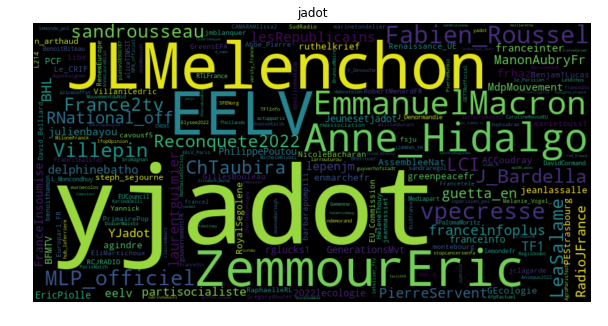

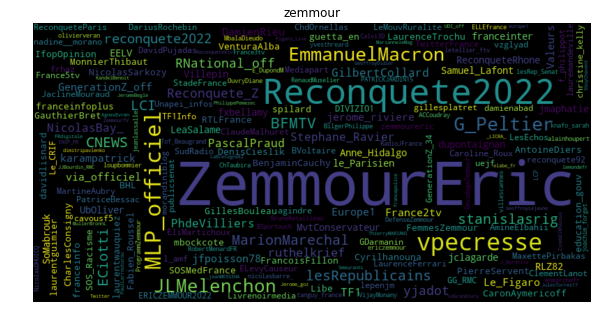

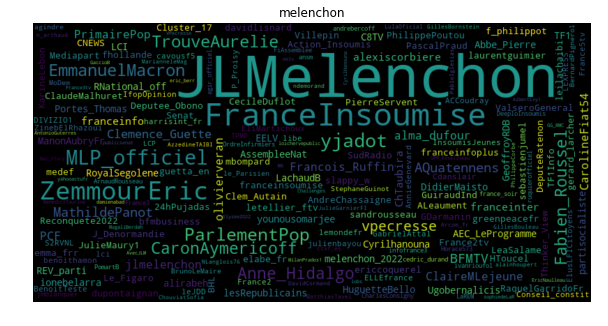

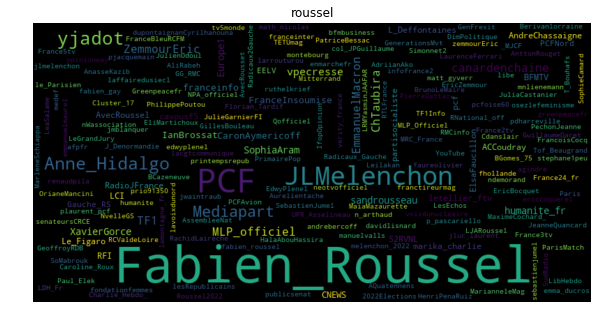

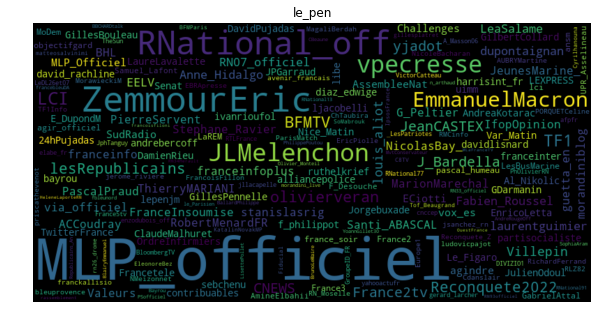

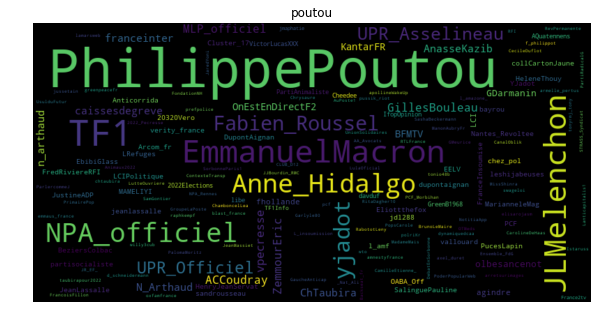

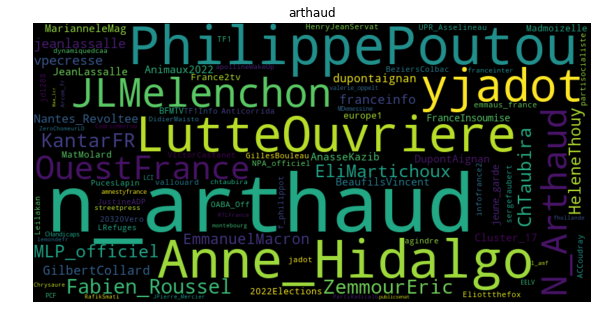

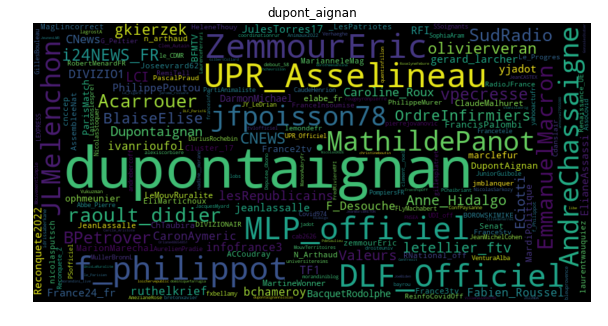

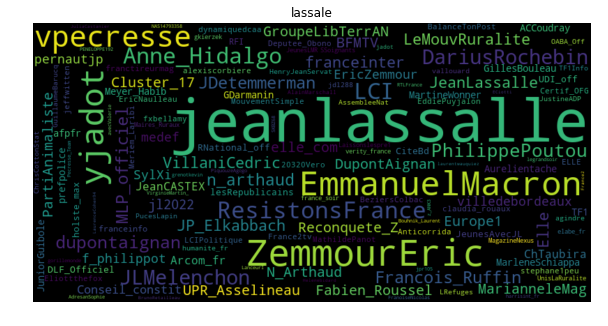

In [40]:
#convert to dict
for cand in df_hashtags['candidate'].unique():

    hashtag_weights = df_accounts[df_accounts['candidate']==cand].set_index('accounts').to_dict()['retweet_count']
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(hashtag_weights)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(cand)
    plt.axis('off')
    plt.show()

### Accounts of the authors

In [48]:
#Listing all the files in the folder:
rel_path_tweets_10RT = 'data/tweets/10'
files_tweets_10RT = [f for f in listdir(rel_path_tweets_10RT) if isfile(join(rel_path_tweets_10RT, f))]
#Initializing a pd df:
df_tweets_10RT = pd.DataFrame()
for f in files_tweets_10RT:
    df_temp = pd.read_csv(rel_path_tweets_10RT+'/'+f)
    #Concat:
    df_tweets_10RT = pd.concat([df_tweets_10RT, df_temp])

In [49]:
selected_tweet_cols = ['id', 'user_name', 'retweet_count', 'candidate']
df_tweets_red = df_tweets_10RT[selected_tweet_cols].copy()

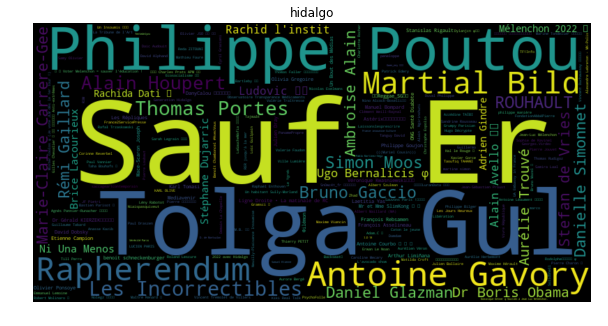

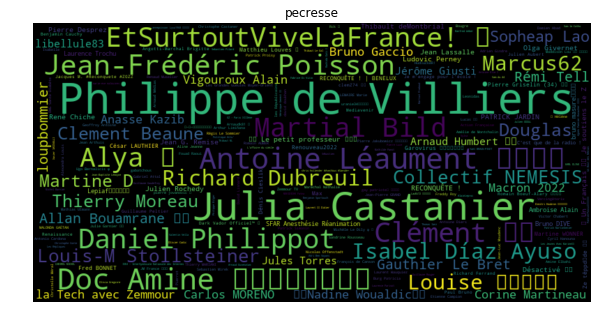

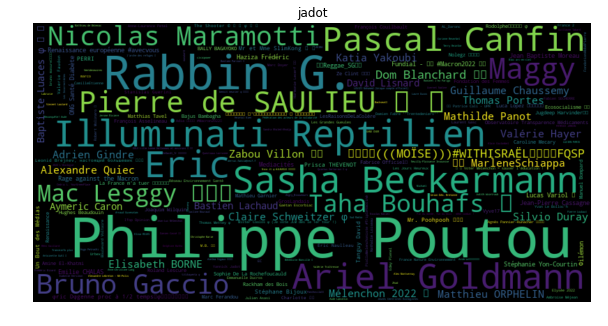

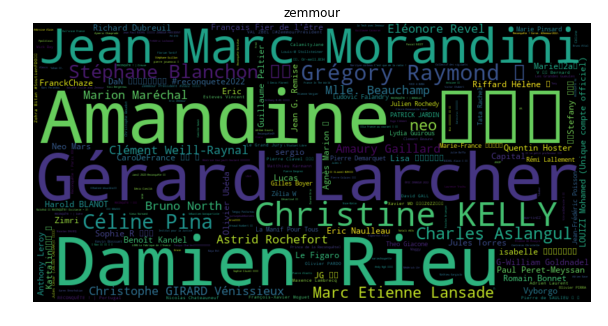

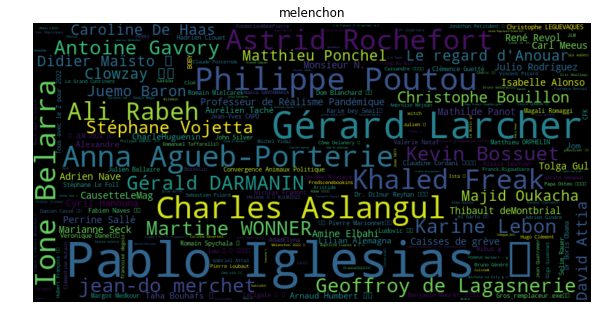

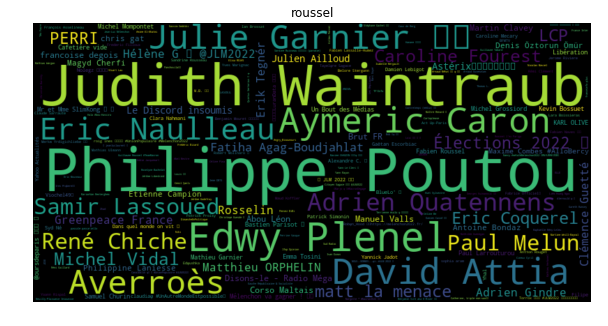

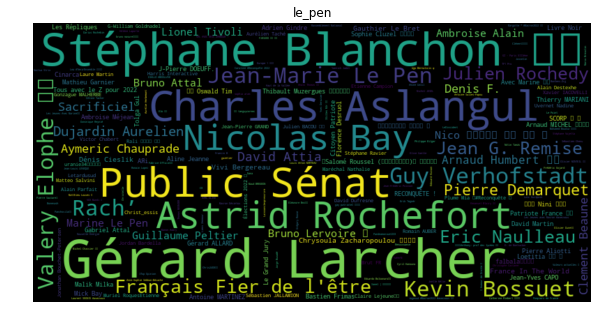

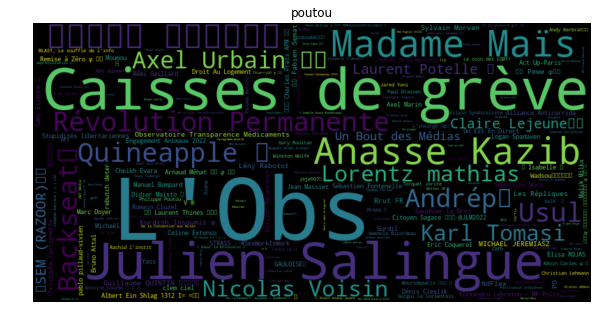

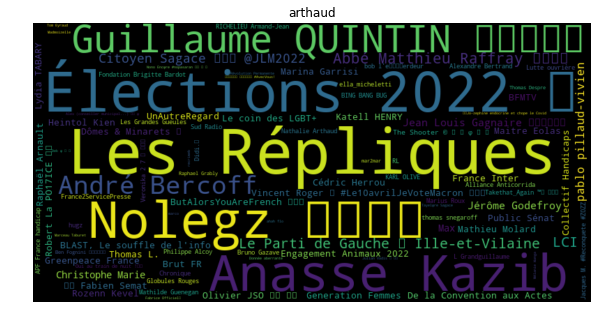

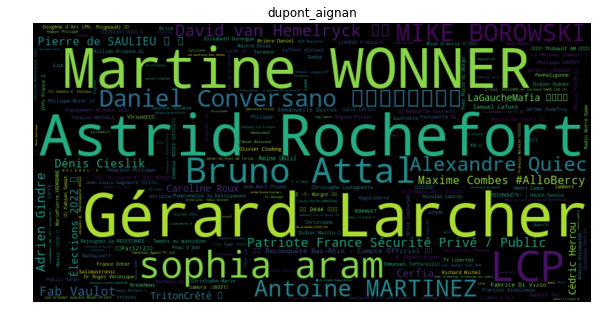

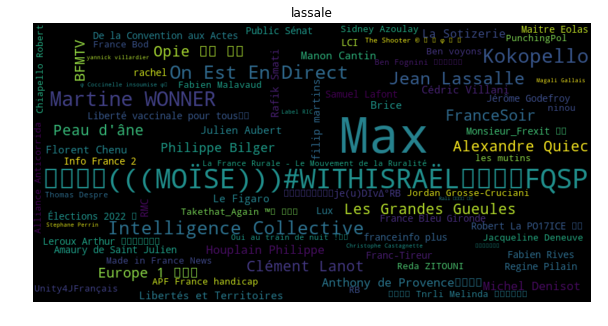

In [51]:
#convert to dict
for cand in df_hashtags['candidate'].unique():

    user_weights = df_tweets_red[df_tweets_red['candidate']==cand].set_index('user_name').to_dict()['retweet_count']
    wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(user_weights)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(cand)
    plt.axis('off')
    plt.show()

## INA - twitter des medias

We can check if the RS_USER_SCREEN_NAME is in the bio / is the author of the tweets. 

Since this is a dataset for "audiovisuel", we can check the results for candidates with a high correlation between number of RT / audiovisuel time ( Arcom data)

In [150]:
df_ina = pd.read_csv('data/INA/depot-legal-du-web-liste-comptes-twitter-audiovisuel.csv')

In [151]:
df_ina.sample(5)

RS_USER_NAME    RS_USER_ID  RS_USER_FRIENDS_COUNT  \
11791  Rom Dunkel (Mouv')  3.004094e+09                  283.0   
8863         Marie Fugain  4.970786e+08                  303.0   
5896        Cartoon Media  1.362061e+08                 1053.0   
14649       Sophie Barjac  4.372630e+08                    9.0   
1748               La rem  1.874612e+09                   39.0   

       RS_USER_FOLLOWERS_COUNT   RS_USER_LOCATION RS_USER_VERIFIED  \
11791                    511.0              Paris              Non   
8863                   16231.0             France              Oui   
5896                    4904.0  Brussels, Belgium              Non   
14649                     32.0              Paris              Non   
1748                     955.0      Paris, France              Non   

                                     RS_USER_DESCRIPTION RS_USER_SCREEN_NAME  \
11791         Radio Host @Mouv' 17h-20h / SnapN'Mix / DJ          RomainMouv   
8863                                                 NaN        mariefugain1   
5896   CARTOON is the European association of animati...       CARTOON_media   
14649  Comédienne. A l'affiche des Liaisons dangereus...        SophieBarjac   
1748   La revue européenne des médias et du numérique...          LaREMedias   

      RS_USER_CREATION_DATE                             RS_USER_URL  \
11791                   NaN   http://t.co/JhZzQ79Iw5 (url inactive)   
8863             2012-02-19  https://t.co/dw8ZMKrHDr (url inactive)   
5896             2010-04-23   http://t.co/95ykEkjcf2 (url inactive)   
14649            2011-12-15   http://t.co/aPS5WgCNFH (url inactive)   
1748             2013-09-17  https://t.co/zDuK5wPIV1 (url inactive)   

                                     RS_DOC_DESCRIPTIONS RS_DOC_DESCRIPTEURS  \
11791                                                NaN                 NaN   
8863   Compte Twitter de  Marie Fugain  qui joue le r...              acteur   
5896                                      Cartoon Media                  NaN   
14649  Compte Twitter de  Sophie Barjac  qui joue le ...              acteur   
1748                                             La rem                  NaN   

       RS_TECH_ACTIVE RS_DOC_EMISSIONS RS_DOC_CHAINES RS_DOC_FONCTION  \
11791               0              NaN            NaN             NaN   
8863                1              NaN       France 3             NaN   
5896                1              NaN            NaN             NaN   
14649               1              NaN       France 3             NaN   
1748                1              NaN           ARTE             NaN   

      RS_DOC_CATEGORIE  
11791               TV  
8863                TV  
5896                TV  
14649               TV  
1748                TV

In [152]:
df_ina_copp = df_ina.dropna(subset=['RS_DOC_CATEGORIE']).copy()
list_ina_user_screen_name = df_ina_copp[df_ina_copp['RS_DOC_CATEGORIE'].str.contains('|'.join(['TV', 'Radio', 'TV & Radio']))]['RS_USER_SCREEN_NAME'].to_list()

### DRAFFFFTTTTTT

In [129]:
df_ina_copy = df_ina[['RS_USER_SCREEN_NAME', 'RS_DOC_DESCRIPTEURS']].copy()
#Splitting and cleaning the RS_DOC_DESCRIPTEURS:
df_ina_copy['descripteurs'] = df_ina_copy['RS_DOC_DESCRIPTEURS'].str.split('\n')
#Exploding:
df_ina_copy = df_ina_copy.explode('descripteurs')
#Dropping nans: 
df_ina_copy.dropna(inplace=True)
#Stripping:
df_ina_copy['descripteurs'] = df_ina_copy['descripteurs'].str.strip()

In [132]:
list(np.unique(df_ina_copy.sort_values('descripteurs')['descripteurs']))

['',
 'AFP-agence',
 'AFP-association',
 'Adams, Kev',
 'Adrien',
 'Afrique',
 'Alcaraz',
 'Alexandre',
 'Alison',
 'Alix',
 'Almeida',
 'Amélie',
 'André',
 'Antoine',
 'Archives',
 'Armelle',
 'Arnold',
 'Asie',
 'Assemblée nationale',
 'Association (M05.COM)',
 'Astier',
 'Audiovisuel',
 'Auriant, Axel',
 'Avignon',
 'Baduel',
 'Barthélémy',
 'Baste Régis Karine',
 'Baud Patrick',
 'Beaudou',
 'Belleili Malik',
 'Belliard Matthieu',
 'Benamran Bruce',
 'Bercoff',
 'Bernard',
 'Berry',
 'Biarritz',
 'Bignolas',
 'Bimar Ugo',
 'Bolo',
 'Bonnec Sidonie',
 'Bordeaux',
 'Bouches du Rhône',
 'Bouilhaguet',
 'Boéri David',
 'Brest',
 'Bretagne',
 'Brigitte',
 'Bril Manon',
 'Brillaud Benjamin',
 'Bruno',
 'C8',
 'CERNOBORI Julien',
 'CNC',
 'CNRS',
 'CNews',
 'CSA',
 'Camila',
 'Camille',
 'Campusano',
 'Canal J',
 'Canal Plus',
 'Capuçon, Gautier',
 'Capuçon, Renaud',
 'Carrouer',
 'Casadebaig',
 'Cassard, Philippe',
 'Chamussy Clothilde',
 'Charrier',
 'Chine',
 'Chironi, Sonia',
 'Choeu

In [123]:
df_ina_copy = df_ina[['RS_USER_SCREEN_NAME', 'RS_DOC_DESCRIPTEURS']].copy()
#Splitting and cleaning the RS_DOC_DESCRIPTEURS:
df_ina_copy['descripteurs'] = df_ina_copy['RS_DOC_DESCRIPTEURS'].str.split('\n')
#Exploding:
df_ina_copy = df_ina_copy.explode('descripteurs')
#Dropping nans: 
df_ina_copy.dropna(inplace=True)
#Stripping:
df_ina_copy['descripteurs'] = df_ina_copy['descripteurs'].str.strip()
#We are taking only the users with as desc: audiovisuel, radio, télévision.
lst = ["audiovisuel", "radio", "télévision", 'média']
df_ina_copy = df_ina_copy[df_ina_copy['descripteurs'].str.contains('|'.join(lst))]

In [124]:
df_ina_copy['descripteurs'].unique()

array(['émission radiophonique', 'radio locale', 'radio', 'télévision',
       'chaîne de télévision', 'audiovisuel', 'média en ligne', 'média',
       'média en ligne (Accropolis)', 'chaîne de radio (Europe 1)',
       'émission radiophonique (Le grand journal du soir)',
       'émission radiophonique (La curiosité est un vilain défaut)',
       'chaîne de télévision (LCP Assemblée nationale)',
       'programmation audiovisuelle', 'audience-média',
       'chaîne de télévision (TF1)', 'producteur audiovisuel',
       'émission radiophonique (NRJ Music Awards)', 'France télévisions',
       'émission radiophonique (Brigitte Lahaie Sud Radio)',
       'média en ligne (StreetPress)', 'média en ligne (web série)',
       'média en ligne (VL Média)',
       'émission radiophonique (LESS & The City)',
       'chaîne de radio (Radio FG)', 'multimédia', 'chaîne de radio',
       'chaîne de radio (Radio Campus France)',
       'chaîne de radio (RFM Strasbourg)',
       'émission radiophonique

We are then using the right descripteurs. 

In [136]:
#Defining the list of accounts with the right properties:
list_ina_user_screen_name = df_ina_copy['RS_USER_SCREEN_NAME'].to_list()

### Test

In [157]:
#---------------------------Importing datasets:


#Listing all the files in the folder:
rel_path_tweets_10RT = 'data/tweets/10'
files_tweets_10RT = [f for f in listdir(rel_path_tweets_10RT) if isfile(join(rel_path_tweets_10RT, f))]
#Initializing a pd df:
df_tweets_10RT = pd.DataFrame()
for f in files_tweets_10RT:
    df_temp = pd.read_csv(rel_path_tweets_10RT+'/'+f)
    #Concat:
    df_tweets_10RT = pd.concat([df_tweets_10RT, df_temp])


#--------------------------Clean & Utilities
#Selecting the right cols:
selected_cols_media = ['id', 'candidate', 'user_screen_name', 'user_description', 'quoted_user', 'retweet_count']
df_tweets_10RT_media = df_tweets_10RT[selected_cols_media].copy()

df_tweets_10RT_media.dropna(subset=['quoted_user'], inplace=True)

#Is this the right regex to extract accounts?
df_tweets_10RT_media['desc_accounts'] = df_tweets_10RT_media['user_description'].str.findall(r"@(\w+)")
#Appending desc_accounts and user_screen_name:
df_tweets_10RT_media['cited_screen_name']=df_tweets_10RT_media.apply(
    lambda x:  np.append(x['user_screen_name'], x['desc_accounts']), axis=1)

df_tweets_10RT_media['cited_screen_name']=df_tweets_10RT_media.apply(
    lambda x:  np.append(x['cited_screen_name'], x['quoted_user']), axis=1)

df_tweets_10RT_media = df_tweets_10RT_media[['id', 'candidate', 'cited_screen_name', 'retweet_count']].copy()

#-----------------computing the stats:
df_tweets_10RT_media['intersection_bool'] = df_tweets_10RT_media['cited_screen_name'].apply(
    lambda x: bool(set(x) & set(list_ina_user_screen_name)))

df_tweets_10RT_media['RT_bool'] = df_tweets_10RT_media['retweet_count'] * df_tweets_10RT_media['intersection_bool']

In [158]:
df_media_gb = df_tweets_10RT_media.groupby('candidate').agg({'id':'count', 'intersection_bool':'sum', 'RT_bool':'sum', 'retweet_count':'sum'}).rename(columns={'intersection_bool':'author_media', 'id':'count'})
df_media_gb['pct_author_media'] = (df_media_gb['author_media'] / df_media_gb['count'])*100
df_media_gb['pct_RT_author_media'] = (df_media_gb['RT_bool'] / df_media_gb['retweet_count'])*100

In [159]:
df_media_gb

count  author_media  RT_bool  retweet_count  pct_author_media  \
candidate                                                                      
arthaud           37            24     2764           3172         64.864865   
dupont_aignan     76            49     6263           7170         64.473684   
hidalgo          989           201     9036          40319         20.323559   
jadot            627           202    11654          30216         32.216906   
lassale           22             7     7326           8612         31.818182   
le_pen           994           270    20492          62739         27.162978   
melenchon       1546           550    53393         127377         35.575679   
pecresse        1967           487    27024         100690         24.758516   
poutou            92            17     1351           8226         18.478261   
roussel          658           270    21714          38071         41.033435   
zemmour         1502           354    64291         290217         23.568575   

               pct_RT_author_media  
candidate                           
arthaud                  87.137453  
dupont_aignan            87.350070  
hidalgo                  22.411270  
jadot                    38.568970  
lassale                  85.067348  
le_pen                   32.662299  
melenchon                41.917301  
pecresse                 26.838812  
poutou                   16.423535  
roussel                  57.035539  
zemmour                  22.152734

The media are not twitting about them!!!!

## Share of verified accounts

In [160]:
#---------------------------Importing datasets:
#Listing all the files in the folder:
rel_path_tweets_10RT = 'data/tweets/10'
files_tweets_10RT = [f for f in listdir(rel_path_tweets_10RT) if isfile(join(rel_path_tweets_10RT, f))]
#Initializing a pd df:
df_tweets_10RT = pd.DataFrame()
for f in files_tweets_10RT:
    df_temp = pd.read_csv(rel_path_tweets_10RT+'/'+f)
    #Concat:
    df_tweets_10RT = pd.concat([df_tweets_10RT, df_temp])

#-------------Compute stats
df_tweets_verif = df_tweets_10RT[['id', 'candidate', 'user_verified', 'retweet_count']].copy()
df_tweets_verif['RT_bool'] = df_tweets_verif['retweet_count'] * df_tweets_verif['user_verified']


df_tweets_verif_gp = df_tweets_verif.groupby('candidate').agg({'id':'count', 'user_verified':'sum', 'retweet_count':'sum', 'RT_bool':'sum'}).rename(columns={'id':'count'})
df_tweets_verif_gp['author_verified_pct'] =  (df_tweets_verif_gp['user_verified'] /df_tweets_verif_gp['count']) * 100
df_tweets_verif_gp['pct_RT_verified'] =  (df_tweets_verif_gp['RT_bool'] /df_tweets_verif_gp['retweet_count']) * 100

In [161]:
df_tweets_verif_gp

count  user_verified  retweet_count  RT_bool  \
candidate                                                     
arthaud          283            184          27207    22446   
dupont_aignan   1203            921         212668   194824   
hidalgo         5010           1542         260497   102524   
jadot           4498           1860         263919   152607   
lassale          172             98          38388    33306   
le_pen          8781           3480         750765   495354   
melenchon      12888           3564        1581846   747978   
pecresse       14808           4674         941471   396524   
poutou           533            218         140707   113656   
roussel         4079           1434         269468   156149   
zemmour        13597           3601        3191210  1987882   

               author_verified_pct  pct_RT_verified  
candidate                                            
arthaud                  65.017668        82.500827  
dupont_aignan            76.558603        91.609457  
hidalgo                  30.778443        39.357075  
jadot                    41.351712        57.823423  
lassale                  56.976744        86.761488  
le_pen                   39.631022        65.979901  
melenchon                27.653631        47.285134  
pecresse                 31.564019        42.117495  
poutou                   40.900563        80.774944  
roussel                  35.155675        57.947140  
zemmour                  26.483783        62.292422

40% for LePen while each of its verified account is verified. 

## Share of candidates mentionning each other

In [52]:
twitter_candidates={'zemmour': ['@ZemmourEric', '@Reconquete2022'], 
                    'le_pen':['@MLP_officiel', '@RNational_off'], 
                   'roussel': ['@Fabien_Roussel', '@PCF'], 
                   'melenchon' : ['@JLMelenchon', '@FranceInsoumise'], 
                   'jadot':['@yjadot', '@EELV'], 
                   'hidalgo':['@Anne_Hidalgo', '@partisocialiste'], 
                   'pecresse':['@vpecresse', '@lesRepublicains'], 
                   'poutou':['@PhilippePoutou', '@NPA_officiel'], 
                   'arthaud':['@n_arthaud', '@LutteOuvriere'],
                   'lassale':['@jeanlassalle'], 
                   'dupont_aignan':['@dupontaignan', '@DLF_Officiel']}

In [162]:
#---------------------------Importing datasets:
#Listing all the files in the folder:
rel_path_tweets_10RT = 'data/tweets/10'
files_tweets_10RT = [f for f in listdir(rel_path_tweets_10RT) if isfile(join(rel_path_tweets_10RT, f))]
#Initializing a pd df:
df_tweets_10RT = pd.DataFrame()
for f in files_tweets_10RT:
    df_temp = pd.read_csv(rel_path_tweets_10RT+'/'+f)
    #Concat:
    df_tweets_10RT = pd.concat([df_tweets_10RT, df_temp])
#---------list of the candidates 

#Retrieving a list of the candidates:
list_candidates_accounts = list(np.unique([item[1:] for sublist in [twitter_candidates[k] for k in twitter_candidates.keys()] for item in sublist]))

#-------------Compute stats
df_tweets_quoting = df_tweets_10RT[['id', 'candidate', 'user_screen_name', 'retweet_count']].copy()

df_tweets_quoting['author_candidate'] = df_tweets_quoting['user_screen_name'].isin(list_candidates_accounts)


df_tweets_quoting['RT_bool'] = df_tweets_quoting['retweet_count'] * df_tweets_quoting['author_candidate']

df_tweets_quoting_gp = df_tweets_quoting.groupby('candidate').agg({'id':'count', 'author_candidate':'sum', 'retweet_count':'sum', 'RT_bool':'sum'}).rename(columns={'id':'count'})
df_tweets_quoting_gp['author_candidate_pct'] =  (df_tweets_quoting_gp['author_candidate'] /df_tweets_quoting_gp['count']) * 100
df_tweets_quoting_gp['pct_RT_candidate'] =  (df_tweets_quoting_gp['RT_bool'] /df_tweets_quoting_gp['retweet_count']) * 100

In [163]:
df_tweets_quoting_gp

count  author_candidate  retweet_count  RT_bool  \
candidate                                                        
arthaud          283               139          27207    20522   
dupont_aignan   1203               802         212668   182057   
hidalgo         5010               621         260497    58652   
jadot           4498              1167         263919   105256   
lassale          172                71          38388    31060   
le_pen          8781              1919         750765   360767   
melenchon      12888              2042        1581846   487547   
pecresse       14808              1504         941471   147574   
poutou           533               203         140707   109425   
roussel         4079               865         269468   113517   
zemmour        13597              1763        3191210  1547554   

               author_candidate_pct  pct_RT_candidate  
candidate                                              
arthaud                   49.116608         75.429118  
dupont_aignan             66.666667         85.606203  
hidalgo                   12.395210         22.515422  
jadot                     25.944864         39.881933  
lassale                   41.279070         80.910701  
le_pen                    21.854003         48.053252  
melenchon                 15.844196         30.821395  
pecresse                  10.156672         15.674832  
poutou                    38.086304         77.767986  
roussel                   21.206178         42.126338  
zemmour                   12.966095         48.494270

We can see candidates clearly still use traditionnal media on Twitter.

## Wordcloud of the complete texts? compared to factiva

## YouTube tryout

Google documentation on the Search API of YouTube: https://developers.google.com/youtube/v3/docs/search/list

Python wrapper for Youtube: https://pypi.org/project/python-youtube/

In [1]:
#pip install --upgrade python-youtube

**On va juste dire que la plupart des vidéos, même celles de candidats comme Mélenchon, sont soit des vidéos de meetings, soit des vidéos de grands medias.**